# Employee Salary Prediction
This notebook demonstrates a machine learning project to predict employee salaries based on features such as experience, education, job role, and location.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

np.random.seed(42)
n_samples = 100

experience = np.random.randint(0, 20, n_samples)
education_level = np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], n_samples)
job_role = np.random.choice(['Software Engineer', 'Data Analyst', 'Manager', 'HR'], n_samples)
location = np.random.choice(['New York', 'San Francisco', 'Austin', 'Seattle'], n_samples)

edu_mapping = {'High School': 30000, 'Bachelors': 50000, 'Masters': 70000, 'PhD': 90000}
role_mapping = {'Software Engineer': 80000, 'Data Analyst': 70000, 'Manager': 100000, 'HR': 60000}
loc_mapping = {'New York': 10000, 'San Francisco': 15000, 'Austin': 5000, 'Seattle': 8000}

base_salary = (
    experience * 2000 +
    [edu_mapping[edu] for edu in education_level] +
    [role_mapping[role] for role in job_role] +
    [loc_mapping[loc] for loc in location] +
    np.random.normal(0, 5000, n_samples)
)

df = pd.DataFrame({
    'Experience': experience,
    'Education': education_level,
    'Job Role': job_role,
    'Location': location,
    'Salary': base_salary
})

df.head()


,Experience,Education,Job Role,Location,Salary
0,6,Masters,HR,San Francisco,151645.537510
1,19,PhD,HR,Seattle,198412.362076
2,14,PhD,Software Engineer,New York,206882.686073
3,10,Bachelors,HR,Seattle,141570.002470
4,7,Masters,Software Engineer,Seattle,174366.188123


In [3]:

df_encoded = pd.get_dummies(df, columns=['Education', 'Job Role', 'Location'], drop_first=True)
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 49982303.89
R² Score: 0.9614


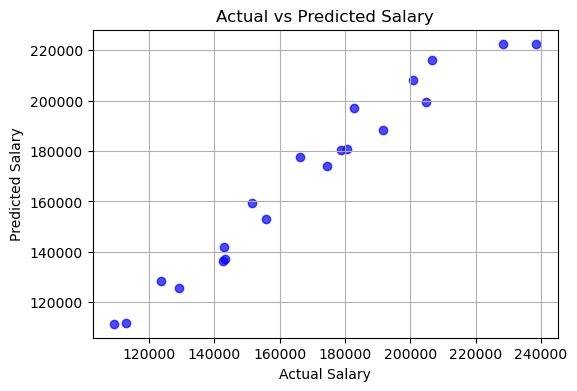

In [5]:

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15208\3172850954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeffs.values, y=coeffs.index, palette='viridis')


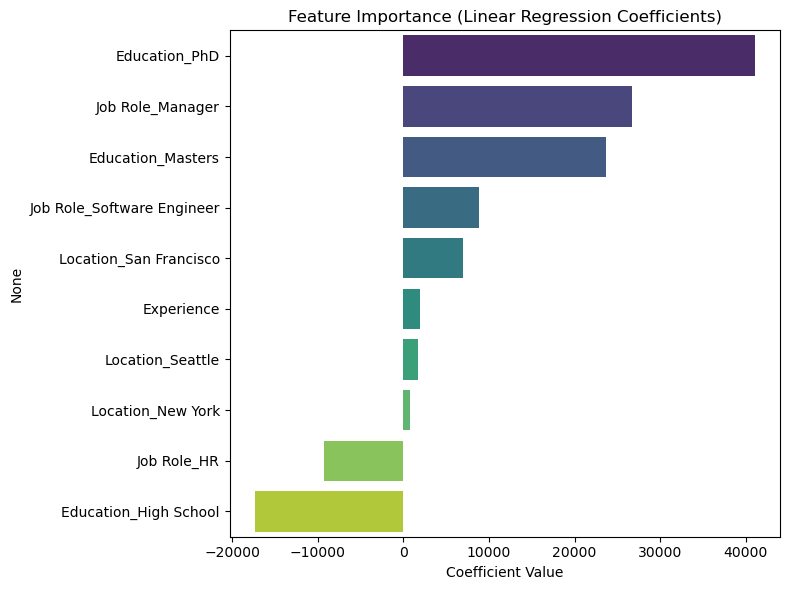

In [6]:

coeffs = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=coeffs.values, y=coeffs.index, palette='viridis')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()
